## Intro

Once the text data is cleaned and tokenized it is ready for NLP analysis. Vectorization of the tokens allows data scientist to mathematically represent text as vectors. There are numerous ways to create these vectors.


+ compare between ML models with different feature representation (count vector, weigthed and unweighted embedding models)

+ single model (e.g., logistic regression with count vector representation), and compare the performance with different amount of info. 

+ Unweighted, you just sum the word embeddings of an job ad as the representation of an job ad. 

+ Weighted sum, ou can do a weighted sum of word embeddings as representation instead of just sum. 

You can do that for any embedding models and generate two version of doc representation

## bulid:

+ count vector representation
+ weigthed embedding representation (use TF-IDF as the weight when you do weighted sum of word embeddings)
+ unweigted embedding representation. 

## Question 
+ load pretrained model or train it from stractch

## Importing libraries

In [1]:
from itertools import chain
import pandas as pd
import numpy as np
from nltk.probability import *
from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def stats_print(tk_description):
    words = list(chain.from_iterable(tk_description)) # we put all the tokens in the corpus in a single list
    vocab = set(words) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words
    lexical_diversity = len(vocab)/len(words)
    print("Vocabulary size: ",len(vocab))
    print("Total number of tokens: ", len(words))
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of description:", len(tk_description))
    lens = [len(article) for article in tk_description]
    print("Average description length:", np.mean(lens))
    print("Maximun description length:", np.max(lens))
    print("Minimun description length:", np.min(lens))
    print("Standard deviation of description length:", np.std(lens))

# Code to import libraries as you need in this assessment, e.g.,
# Read job_ad.csv
job_ad = pd.read_csv('job_ad.csv')

# # get the description of the job ad
# description = job_ad['Description']
# # get the tokenized description of the job ad
# tk_description = job_ad['Tokenized Description']
webindex = job_ad['Webindex']


# print first 3 rows
job_ad.head(3)

,Title,Webindex,Company,Description,Tokenized Description,Category
0,Finance / Accounts Asst Bromley to ****k,68997528,First Recruitment Services,Accountant (partqualified) to **** p.a. South ...,accountant partqualified south east london cli...,Accounting_Finance
1,Fund Accountant Hedge Fund,68063513,Austin Andrew Ltd,One of the leading Hedge Funds in London is cu...,leading hedge funds london recruiting fund acc...,Accounting_Finance
2,Deputy Home Manager,68700336,Caritas,An exciting opportunity has arisen to join an ...,exciting opportunity arisen join establish pro...,Healthcare_Nursing


In [2]:
descriptionFile = './description.txt'
with open(descriptionFile) as f:
    tk_description = f.read().splitlines() # read all the descriptions into a list
    
print(len(tk_description))
type(tk_description)

#### Converting each description text string into list of tokens

In [5]:
tk_description = [description.split(" ") for description in tk_description] # note that we have to revert the join string into

# Explore the current statistics
stats_print(tk_description)

Vocabulary size:  5218
Total number of tokens:  102975
Lexical diversity:  0.05067249332362224
Total number of description: 776
Average description length: 132.69974226804123
Maximun description length: 471
Minimun description length: 12
Standard deviation of description length: 70.3782402519735


#### Reading the corresponding category labels

In [6]:
# read the category of the job ad
categoryFile = './category.txt'
with open(categoryFile) as f:
    category = f.read().splitlines() # read all the category into a list
    
print(len(category))
type(category)

#### Making sure we done it right
Take an example, e.g., the 10th element

In [7]:
print(f'The number of the category: {len(category)}')
print(f'The number of the description: {len(tk_description)}')
if len(category) == len(tk_description):
    print(f'The number of category of category and description are the same and corresponding to each other')

The number of the category: 776
The number of the description: 776
The number of category of category and description are the same and corresponding to each other


In [8]:
test_index = 20
print(category[test_index])
tk_description[test_index]

0


['client',
 'based',
 'eastleigh',
 'investments',
 'treasury',
 'controller',
 'join',
 'team',
 'duties',
 'include',
 'responsibility',
 'transactional',
 'management',
 'analysis',
 'oversight',
 'company',
 'investment',
 'portfolio',
 'including',
 'compliance',
 'relevant',
 'sections',
 'relevant',
 'policies',
 'ensure',
 'working',
 'capital',
 'liquid',
 'resources',
 'cashflow',
 'managed',
 'efficiently',
 'deliver',
 'consistently',
 'relevant',
 'kpis',
 'analysing',
 'putting',
 'action',
 'plans',
 'place',
 'process',
 'issues',
 'manage',
 'day',
 'day',
 'relationships',
 'company',
 'outsourced',
 'investment',
 'managers',
 'ensuring',
 'mutual',
 'understanding',
 'operations',
 'systems',
 'developments',
 'business',
 'efficiently',
 'effectively',
 'endtoend',
 'investment',
 'processes',
 'ensuring',
 'processes',
 'procedures',
 'risks',
 'controls',
 'documented',
 'effective',
 'efficient',
 'regularly',
 'review',
 'test',
 'processes',
 'controls',
 'acc

### ----------------> OBSERVATION

We can see the length of the description text and corresponding labels are equal.

Convert the loaded category labels to integers:

In [9]:
category = [int(s) for s in category]
sum(category) # seeing the total number of

1095

## Constructing the Vocabulary

Now, we complete all the basic pre-process step and we are ready to move to feature generation! &#129321;
Before we start, in this task, you are required to construct the final vocabulary, e.g., `vocab`:

In [10]:
# generating the vocabulary

words = list(chain.from_iterable(tk_description)) # we put all the tokens in the corpus in a single list
vocab = sorted(list(set(words))) # compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words

len(vocab)

5218

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 2. Generating Feature Representations</strong></h3>

So let's say we do binary feature representation but with 3 types of data, the title, the description, and title+description.

In [11]:
from collections import Counter

"""
Bag-of-words model:
Generate the Count vector representation for each job advertisement description, and save
them into a file (please refer to the required output). Note, the generated Count vector
representation must be based on the generated vocabulary in Task 1 (as saved in vocab.txt).
"""
# bag of words model
def bag_of_words(description, vocab):
    # create a list of 0s with the same length as the vocab
    bow = [0] * len(vocab)
    # count the number of times each word appears in the description
    word_counts = Counter(description)
    # update the bow list with the word counts
    for word, count in word_counts.items():
        bow[vocab.index(word)] = count
    return bow

# Generate the Count vector representation for each job advertisement description
bow = [bag_of_words(description, vocab) for description in tk_description]

## 2.1 Saving outputs
Save the count vector representation as per spectification.
- `count_vectors.txt`

`count_vectors.txt` stores the sparse count vector representation of job advertisement descriptions in the following format. Each line of this file corresponds to one advertisement. It starts with a ‘#’ key followed by the webindex of the job advertisement, and a comma ‘,’. The rest of the line is the sparse representation of the corresponding description in the form of word_integer_index:word_freq separated by comma. Following is an example of the file format.

In [12]:

# save count vector representation of job advertisement descriptions
with open('count_vectors.txt', 'w') as f:
    for i, description in enumerate(tk_description):
        f.write('#' + str(webindex[i]) + ',')
        for word in description:
            f.write(str(vocab.index(word)) + ':' + str(bow[i][vocab.index(word)]) + ',')
        f.write('\n')
    print("Successfully write count vector representation of job advertisement descriptions into count_vectors.txt file")


Successfully write count vector representation of job advertisement descriptions into count_vectors.txt file


<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 2. Generating Feature Representations</strong></h3>

So let's say we do binary feature representation but with 3 types of data, the title, the description, and title+description.

## Task 5. Generating Feature Vectors

In this task, we are going to generate feature vectors from tokenized review text. We are going to explore different feature vectors, including binary, count, and tf-idf vectors.

### Task 5.1 Generating Binary Vectors
In this subtask, let's start with generating the binary vector representation for each review.

We need to first import the `CountVectorizer` and initialise it.

In [13]:
# binding the words together for each review
joined_description = [' '.join(review) for review in tk_description]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
bVectorizer = CountVectorizer(analyzer = "word",binary = True,vocabulary = vocab) # initialise the CountVectorizer

In [15]:
binary_features = bVectorizer.fit_transform(joined_description)
binary_features.shape

(776, 5218)

### Task 5.2 Generating Count Vectors

In this subtasks, you are required to generate the count vector features of review texts.

In [16]:
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocab) # initialised the CountVectorizer
count_features = cVectorizer.fit_transform(joined_description)
count_features.shape

(776, 5218)

### Task 5.3 Generating TF-IDF Vectors

![](media/images/td-idf-graphic.png)
Source: http://filotechnologia.blogspot.com/2014/01/a-simple-java-class-for-tfidf-scoring.html

In this subtasks, you are required to generate the count vector features of review texts.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab) # initialised the TfidfVectorizer
tfidf_features = tVectorizer.fit_transform(joined_description) # generate the tfidf vector representation for all articles
tfidf_features.shape

(776, 5218)

In [18]:
tfidf_features

<776x5218 sparse matrix of type '<class 'numpy.float64'>'
	with 75446 stored elements in Compressed Sparse Row format>

In [19]:
# joined_description

In [20]:
tfidf_features

<776x5218 sparse matrix of type '<class 'numpy.float64'>'
	with 75446 stored elements in Compressed Sparse Row format>

In [21]:
# save count vector representation of job advertisement descriptions
with open('count_vectors.txt', 'w') as f:
    for i, description in enumerate(tk_description):
        f.write('#' + str(webindex[i]) + ',')
        for word in description:
            f.write(str(vocab.index(word)) + ':' + str(bow[i][vocab.index(word)]) + ',')
        f.write('\n')
    print("Successfully write count vector representation of job advertisement descriptions into count_vectors.txt file")

Successfully write count vector representation of job advertisement descriptions into count_vectors.txt file


## Task 6. Training Logistic Regression Models for label Classification

In this final task, you are required to bulid logistic regression models based on different feature vectors (binary, count and tfidf vectors), explore the cases where the model produced false predictions, and evaluate the performance of the model using a 5-fold cross-validation.

In the following, we first uses count vector features as an example to bulid a logistic regression model and  explore the preformance of the model:

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

seed = 3879312
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_features, category, list(range(0,len(category))),test_size=0.2, random_state=seed)

max_iter = 1000 # this is a relative harder problem and we have to increase the maximum iteration parameter of the logistic regression model.

model = LogisticRegression(random_state=seed,max_iter=max_iter, multi_class='multinomial') # initial a logistic regression model
model.fit(X_train, y_train) # fit the model
model.score(X_test, y_test) # calculated the accuracy score on the test data

0.8589743589743589

Looking at the confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

Text(0.5, 14.09375, 'Predicted')

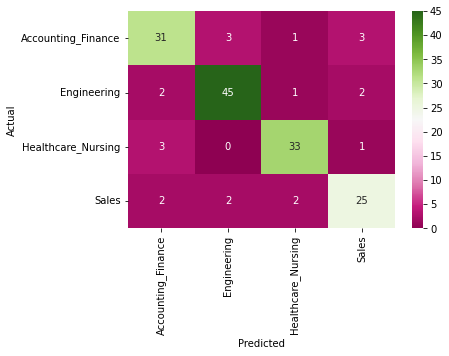

In [37]:
categories = ['Accounting_Finance', 'Engineering', 'Healthcare_Nursing', 'Sales'] # this gives sorted set of unique label names

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories, cmap="PiYG") # creates a heatmap from the confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')

Let's explore some mis-classified examples.

In [25]:
import random

y_pred_prob = model.predict_proba(X_test) # instead of getting the direct prediction, i.e., a label, we can also get the probability distributions of labels

for p_ind in range(0, 2):
    for a_ind in range(0, 2):
        if p_ind !=  a_ind: # when it mis-classifies
            print("'{}' predicted as '{}' : {} examples.".format(categories[a_ind], categories[p_ind],\
                                                                 conf_mat[a_ind, p_ind]))
            print("====================================================")

            # retrieve the indices for the mis-classification
            mis_inds = [test_indices[i] for i in range(0,len(y_test)) if \
                        y_pred[i] == p_ind and y_test[i] == a_ind]
            #print out the article ID and the tokenised text content of the mis-classified examples
            for ind in random.sample(mis_inds,2): # explore 2 examples
                print("------------------------------------------------")
                print(joined_description[ind])
                print("-----------------------------------------------\n")
            print()

'Engineering' predicted as 'Accounting_Finance' : 2 examples.
------------------------------------------------
production coordinator sandbach salary pound ndash client rsquo experts supplying tailored refrigeration control solutions niche markets supermarkets industrial refrigeration plants client established company years contracting past years set expand nbsp nbsp due restructuring client production coordinator join small friendly team based sandbach nbsp nbsp nbsp nbsp nbsp nbsp nbsp nbsp nbsp nbsp nbsp production coordinator ndash role requirements successful candidate manage administrative tasks relating production activities meet company targets order input company crm system nbsp include regular telesales contact build strong working relationships clients suppliers raising purchase orders suppliers prioritising work load answering client queries email telephone internal external research information awareness stock control procedures assist stock audits perform clerical duties 

### 5-Fold Cross Validation

In [26]:
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits= num_folds, random_state=seed, shuffle = True) # initialise a 5 fold validation
print(kf)

KFold(n_splits=5, random_state=3879312, shuffle=True)


In [27]:
def evaluate(X_train,X_test,y_train, y_test,seed):
    model = LogisticRegression(random_state=seed,max_iter = 1000)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [28]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

num_models = 3
cv_df = pd.DataFrame(columns = ['binary','count','tfidf'],index=range(num_folds)) # creates a dataframe to store the accuracy scores in all the folds

fold = 0
for train_index, test_index in kf.split(list(range(0,len(category)))):
    y_train = [str(category[i]) for i in train_index]
    y_test = [str(category[i]) for i in test_index]

    X_train_binary, X_test_binary = binary_features[train_index], binary_features[test_index]
    cv_df.loc[fold,'binary'] = evaluate(binary_features[train_index],binary_features[test_index],y_train,y_test,seed)

    X_train_count, X_test_count = count_features[train_index], count_features[test_index]
    cv_df.loc[fold,'count'] = evaluate(count_features[train_index],count_features[test_index],y_train,y_test,seed)

    X_train_tfidf, X_test_tfidf = tfidf_features[train_index], tfidf_features[test_index]
    cv_df.loc[fold,'tfidf'] = evaluate(tfidf_features[train_index],tfidf_features[test_index],y_train,y_test,seed)

    fold +=1

Printing the result of each fold for each vector representation:

In [29]:
cv_df

,binary,count,tfidf
0,0.833333,0.858974,0.858974
1,0.896774,0.890323,0.903226
2,0.890323,0.890323,0.890323
3,0.890323,0.896774,0.916129
4,0.870968,0.883871,0.929032


In [30]:
cv_df.mean()

binary    0.876344
count     0.884053
tfidf     0.899537
dtype: float64

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 3. Job Advertisement Classification</strong></h3>

...... Sections and code blocks on buidling classification models based on different document feature represetations. 
Detailed comparsions and evaluations on different models to answer each question as per specification. 

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In [31]:
# Code to perform the task...


In [32]:
import os

# The .py format of the jupyter notebook
for fname in os.listdir():
    if fname.endswith('ipynb'):
        os.system(f'jupyter nbconvert {fname} --to python')

[NbConvertApp] Converting notebook task1.ipynb to python
[NbConvertApp] Writing 29017 bytes to task1.py
[NbConvertApp] Converting notebook task2_3.ipynb to python
[NbConvertApp] Writing 14897 bytes to task2_3.py


<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Summary</strong></h3>
Give a short summary and anything you would like to talk about the assessment tasks here.

## Couple of notes for all code blocks in this notebook
- please provide proper comment on your code
- Please re-start and run all cells to make sure codes are runable and include your output in the submission.   
<span style="color: red"> This markdown block can be removed once the task is completed. </span>

# Reference

+ https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
+ https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63